In [1]:
import pandas as pd

In [2]:
mvps = pd.read_csv("mvps.csv")

In [3]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [4]:
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Larry Bird,1986,765.0,780,0.981
1,Dominique Wilkins,1986,407.0,780,0.522
2,Magic Johnson,1986,205.0,780,0.263
3,Hakeem Olajuwon,1986,193.0,780,0.247
4,Kareem Abdul-Jabbar,1986,135.0,780,0.173


In [5]:
player_stats = pd.read_csv("player_stats.csv")

In [6]:
player_stats

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Kareem Abdul-Jabbar*,C,38,LAL,79,79,33.3,9.6,...,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986
1,1,2,Alvan Adams,C,31,PHO,78,45,25.7,4.4,...,1.9,4.2,6.1,4.2,1.3,0.6,2.6,3.5,10.8,1986
2,2,3,Michael Adams,PG,23,SAC,18,0,7.7,0.9,...,0.1,0.2,0.3,1.2,0.5,0.1,0.6,0.5,2.2,1986
3,3,4,Mark Aguirre,SF,26,DAL,74,73,33.8,9.0,...,2.4,3.6,6.0,4.6,0.8,0.2,3.4,3.1,22.6,1986
4,4,5,Danny Ainge,SG,26,BOS,80,78,30.1,4.4,...,0.6,2.4,2.9,5.1,1.2,0.1,1.6,2.6,10.7,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20273,807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
20274,808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
20275,809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
20276,810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [7]:
del player_stats["Unnamed: 0"]

In [8]:
del player_stats["Rk"]

In [10]:
player_stats["Player"] = player_stats["Player"].str.replace("*","", regex=False)

In [11]:
player_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,0.564,...,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986
1,Alvan Adams,C,31,PHO,78,45,25.7,4.4,8.7,0.502,...,1.9,4.2,6.1,4.2,1.3,0.6,2.6,3.5,10.8,1986
2,Michael Adams,PG,23,SAC,18,0,7.7,0.9,2.4,0.364,...,0.1,0.2,0.3,1.2,0.5,0.1,0.6,0.5,2.2,1986
3,Mark Aguirre,SF,26,DAL,74,73,33.8,9.0,17.9,0.503,...,2.4,3.6,6.0,4.6,0.8,0.2,3.4,3.1,22.6,1986
4,Danny Ainge,SG,26,BOS,80,78,30.1,4.4,8.8,0.504,...,0.6,2.4,2.9,5.1,1.2,0.1,1.6,2.6,10.7,1986


In [12]:
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

player_stats = player_stats.groupby(["Player", "Year"]).apply(single_team)

In [13]:
player_stats

Player Pos  Age   Tm   G  GS    MP   FG  \
Player         Year                                                          
A.C. Green     1986 113        A.C. Green  PF   22  LAL  82   1  18.8  2.5   
               1987 497        A.C. Green  PF   23  LAL  79  72  28.4  4.0   
               1988 883        A.C. Green  PF   24  LAL  82  64  32.1  3.9   
               1989 1317       A.C. Green  PF   25  LAL  82  82  30.6  4.9   
               1990 1762       A.C. Green  PF   26  LAL  82  82  33.0  4.7   
...                                   ...  ..  ...  ...  ..  ..   ...  ...   
Željko Rebrača 2002 7946   Željko Rebrača   C   29  DET  74   4  15.9  2.6   
               2003 8427   Željko Rebrača   C   30  DET  30  12  16.3  2.7   
               2004 8987   Željko Rebrača   C   31  ATL  24   2  11.4  1.4   
               2005 9565   Željko Rebrača   C   32  LAC  58   2  16.0  2.3   
               2006 10137  Željko Rebrača   C   33  LAC  29   2  14.2  1.8   

                           FGA    FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player         Year                    ...                                      
A.C. Green     1986 113    4.7  0.539  ...  2.0  2.7  4.6  0.7  0.6  0.6  1.2   
               1987 497    7.4  0.538  ...  2.7  5.1  7.8  1.1  0.9  1.0  1.3   
               1988 883    7.8  0.503  ...  3.0  5.7  8.7  1.1  1.1  0.5  1.5   
               1989 1317   9.2  0.529  ...  3.1  5.9  9.0  1.3  1.1  0.7  1.5   
               1990 1762   9.8  0.478  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4   
...                        ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
Željko Rebrača 2002 7946   5.1  0.505  ...  1.1  2.8  3.9  0.5  0.4  1.0  1.1   
               2003 8427   4.8  0.552  ...  0.9  2.2  3.1  0.3  0.2  0.6  1.0   
               2004 8987   3.2  0.442  ...  1.0  1.5  2.4  0.3  0.2  0.5  0.7   
               2005 9565   4.0  0.568  ...  0.8  2.3  3.2  0.4  0.2  0.7  0.8   
               2006 10137  3.3  0.542  ...  0.4  1.8  2.2  0.3  0.2  0.7  0.8   

                            PF   PTS  Year  
Player         Year                         
A.C. Green     1986 113    2.8   6.4  1986  
               1987 497    2.2  10.8  1987  
               1988 883    2.5  11.4  1988  
               1989 1317   2.1  13.3  1989  
               1990 1762   2.5  12.9  1990  
...                        ...   ...   ...  
Željko Rebrača 2002 7946   2.6   6.9  2002  
               2003 8427   2.6   6.6  2003  
               2004 8987   2.2   3.8  2004  
               2005 9565   2.2   5.8  2005  
               2006 10137  2.0   4.7  2006  

[16410 rows x 30 columns]

In [15]:
player_stats.index = player_stats.index.droplevel()

In [16]:
player_stats.index = player_stats.index.droplevel()

In [17]:
player_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
113,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986
497,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,0.538,...,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987
883,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,0.503,...,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988
1317,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,0.529,...,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989
1762,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990


In [18]:
join = player_stats.merge(mvps, how="outer", on=["Player", "Year"])

In [19]:
join[join["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
156,Adrian Dantley,SF,30,UTA,76,75,36.1,10.8,19.1,0.563,...,3.5,0.8,0.1,3.0,2.7,29.8,1986,2.0,780.0,0.003
158,Adrian Dantley,SF,32,DET,69,50,31.1,6.4,12.5,0.514,...,2.5,0.6,0.1,2.0,2.1,20.0,1988,1.0,800.0,0.001
212,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,0.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
306,Alex English,SF,32,DEN,81,81,37.3,11.7,23.3,0.504,...,4.0,0.9,0.4,3.1,2.9,29.8,1986,55.0,780.0,0.071
307,Alex English,SF,33,DEN,82,82,37.6,11.8,23.4,0.503,...,5.1,0.9,0.3,2.6,2.6,28.6,1987,2.0,780.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15821,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,0.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
15822,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,0.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
15826,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,0.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
16259,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,0.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [20]:
join

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,NaN,NaN,NaN
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,0.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,NaN,NaN,NaN
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,0.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,NaN,NaN,NaN
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,0.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,NaN,NaN,NaN
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,0.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
16406,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,0.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
16407,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,0.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
16408,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,0.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN


In [21]:
join[["Pts Won", "Pts Max", "Share"]] = join[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [22]:
join

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,0.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,0.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,0.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,0.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
16406,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,0.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
16407,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,0.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
16408,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,0.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [23]:
team_stats = pd.read_csv("team_stats.csv")

In [24]:
team_stats

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,67,15,.817,—,114.1,104.7,9.06,1986,Boston Celtics*
1,1,54,28,.659,13.0,110.4,108.0,2.46,1986,Philadelphia 76ers*
2,2,39,43,.476,28.0,103.0,104.8,-1.28,1986,Washington Bullets*
3,3,39,43,.476,28.0,109.1,111.1,-1.39,1986,New Jersey Nets*
4,4,23,59,.280,44.0,98.7,104.3,-4.82,1986,New York Knicks
...,...,...,...,...,...,...,...,...,...,...
1199,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies*
1200,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks*
1201,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans*
1202,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [25]:
team_stats = team_stats[~team_stats["W"].str.contains("Division")].copy()

In [26]:
team_stats["Team"] = team_stats["Team"].str.replace("*", "", regex=False)

In [27]:
dataframe = pd.read_csv("teamnames.txt")
dataframe.to_csv('teamnames.csv', 
                  index = None)

In [28]:
sorted(team_stats["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

In [29]:
sorted(join["Tm"].unique())

['ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS',
 'WSB']

In [30]:
teamnames = {}
with open("teamnames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        teamnames[abbrev] = name

In [32]:
join["Team"] = join["Tm"].map(teamnames)

In [33]:
join.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,...,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,0.538,...,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,0.503,...,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,0.529,...,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0,Los Angeles Lakers


In [34]:
all_stats = join.merge(team_stats, how="outer",on=["Team", "Year"])

In [35]:
all_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,...,0.000,Los Angeles Lakers,8,62,20,.756,—,117.3,109.5,6.84
1,Byron Scott,SG,24,LAL,76,62,28.8,6.7,13.0,0.513,...,0.000,Los Angeles Lakers,8,62,20,.756,—,117.3,109.5,6.84
2,James Worthy,SF,24,LAL,75,73,32.7,8.4,14.5,0.579,...,0.009,Los Angeles Lakers,8,62,20,.756,—,117.3,109.5,6.84
3,Jerome Henderson,C,26,LAL,1,0,3.0,2.0,3.0,0.667,...,0.000,Los Angeles Lakers,8,62,20,.756,—,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,0.564,...,0.173,Los Angeles Lakers,8,62,20,.756,—,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.000,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
16406,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.000,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
16407,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.000,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
16408,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.000,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45


In [36]:
del all_stats["Unnamed: 0"]

In [37]:
all_stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [38]:
all_stats = all_stats.apply(pd.to_numeric, errors='ignore')

In [39]:
all_stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [40]:
all_stats["GB"].unique()

array(['—', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '38.0', '46.0', '10.5', '32.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '53.0', '47.0', '32.5',
       '4.5'], dtype=object)

In [41]:
all_stats["GB"] = pd.to_numeric(all_stats["GB"].str.replace("—","0"))

In [42]:
all_stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [43]:
all_stats.to_csv("all_stats.csv")

In [46]:
all_stats['Share']

0        0.000
1        0.000
2        0.009
3        0.000
4        0.173
         ...  
16405    0.000
16406    0.000
16407    0.000
16408    0.000
16409    0.000
Name: Share, Length: 16410, dtype: float64

In [48]:
all_stats['PTS']

0         6.4
1        15.4
2        20.0
3         4.0
4        23.4
         ... 
16405     6.2
16406     0.6
16407    10.8
16408     4.0
16409     8.5
Name: PTS, Length: 16410, dtype: float64

In [65]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(all_stats['Player'],all_stats['PTS'])#,all_stats['Share'])
plt.show()

AttributeError: 'function' object has no attribute 'bar'

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

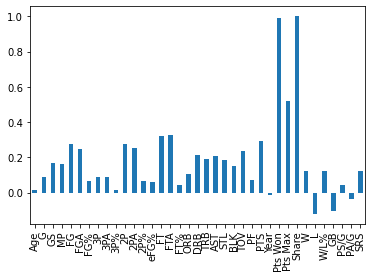

In [72]:
all_stats.corr()["Share"].plot.bar()